In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os

plt.style.use('bmh')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pwd
%load_ext altair

In [2]:
import sys
sys.path.append('../datasets/')

In [279]:
!ls ../datasets/digits_recognizer/train.csv

../datasets/digits_recognizer/train.csv


In [ ]:
# download data from https://www.kaggle.com/competitions/digit-recognizer/data, and store it in ../datasets/digits_recognizer/ location to run this file

# This notebook implements a neural network from scratch on a dataset of digits
## Steps required to prepare algorithm from scratch
1. Prepping data to get images in proper format
2. Choose the Dimensions of the different layers of NN
3. Initialize Parameters using the He Uniform
4. Execute Forward Propagation using the initialized parameters:
    a. Initial layers are activated using RELU 
    b. Final layer is activated using softmax since our target has multiple classes(10)
5. Compute Cost for multiple classes
6. Calculating gradient through backward propagation
7. Updating parameters based on calculated gradients
8. Predicting Y_pred using forward propogation and updated parameters
9. Calculating Accuracy

# 1) Data

## a) Load Data

In [280]:
# Load the data
train_df = pd.read_csv("../datasets/digits_recognizer/train.csv")
print(train_df.shape)

(42000, 785)


In [281]:
train_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## b) Coverage and Distribution

In [6]:
# lets see the distribution of labels
train_df.label.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [7]:
# distribution of data is balanced.

In [8]:
# no null values in the target
train_df.label.isnull().value_counts()

False    42000
Name: label, dtype: int64

In [9]:
# no null values in the dataset as well
train_df.isnull().any().value_counts()

False    785
dtype: int64

# 2) Normalize and Reshape Data

In [10]:
target_col = ['label']
feature_cols = list(train_df.drop(labels=target_col, axis=1).columns)
len(feature_cols)
X_train = (train_df[feature_cols] / 255)
y_train = train_df[target_col]
print(X_train.shape, y_train.shape)

(42000, 784) (42000, 1)


In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# pixel size
np.sqrt(X_train.shape[1])

28.0

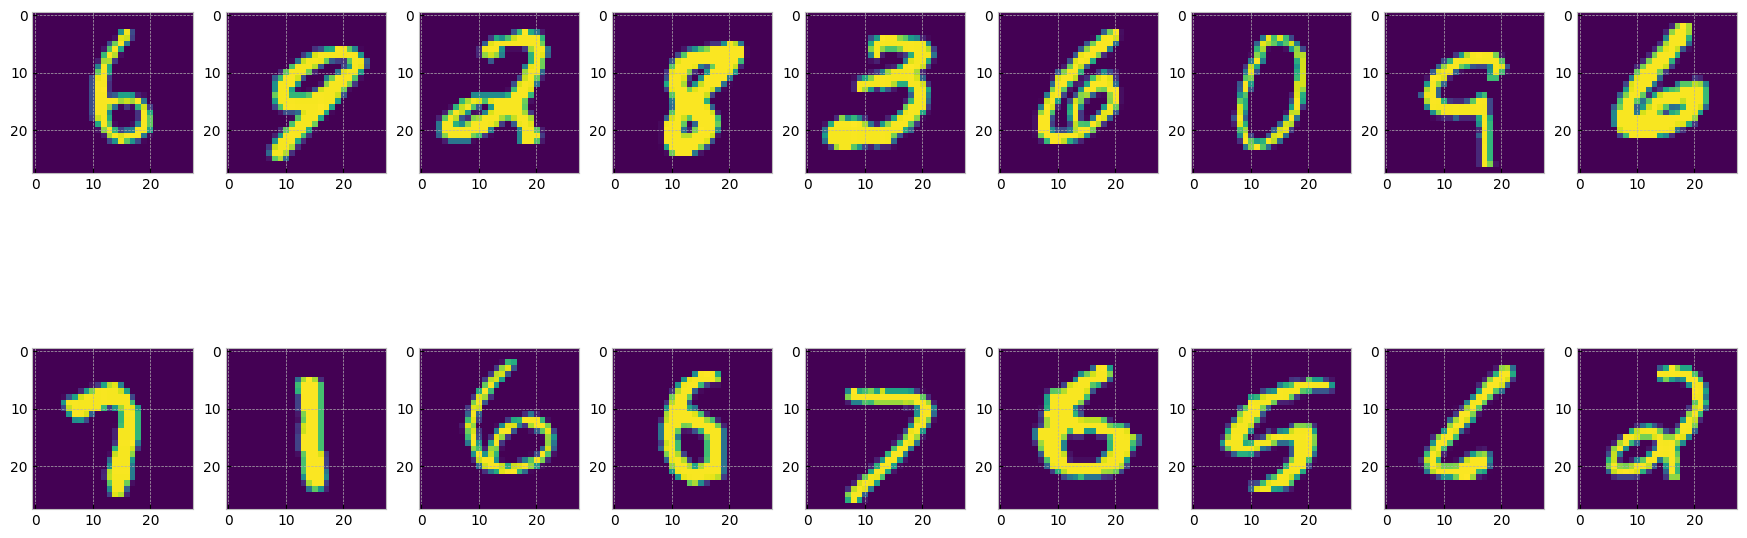

In [13]:
height = 28
width = 28

#displaying random images from the dataset
loc_list = np.random.randint(0, X_train.shape[0], 18)

fig, axs = plt.subplots(figsize=(22, 8), ncols=9, nrows=2)
axs = axs.ravel()

for ind, loc in enumerate(loc_list):
    chosen_image = X_train.iloc[loc].values
    axs[ind].imshow(chosen_image.reshape(height, width))

In [14]:
# most of the images look decent to human eye. so, we can proceed with building a Deep Learning model

# 3) L-Layer NN from scratch

In [209]:
import sys
sys.path.append('../src/')
import deep_learning_algorithm_from_scratch as dl

## a) Prepping data

In [219]:
# Transpose X to be of the format (pixels, n_rows)
X = X_train.T.values.copy()

# Get y in the format (n_classes, n_rows)
Y = pd.get_dummies(y_train.label).T.values.copy()

print(X_train.shape, y_train.shape, X.shape, Y.shape)

(42000, 784) (42000, 1) (784, 42000) (10, 42000)


## b) Initialize Parameters

In [224]:
# deciding the number of units and number of layers
layers_dims = [X.shape[0], 5, 7, 10]
# we use He initialization when we have RELU units
init_type = 'he_uniform'
parameters = dl.initialize_parameters(layers_dims=layers_dims, init_type=init_type)

## c) Train L layer Model and get Parameters

Cost after iteration 0: 10074.819972
Cost after iteration 100: 7949.226154
Cost after iteration 200: 6982.045865
Cost after iteration 300: 6251.568333
Cost after iteration 400: 5741.321057
Cost after iteration 500: 5371.138966
Cost after iteration 600: 5040.774703
Cost after iteration 700: 4716.368171
Cost after iteration 800: 4402.825424
Cost after iteration 900: 4112.216782
Cost after iteration 1000: 3856.573848
Cost after iteration 1100: 3629.110207
Cost after iteration 1200: 3412.352906
Cost after iteration 1300: 3210.842864
Cost after iteration 1400: 3025.641297
Cost after iteration 1500: 2862.611623
Cost after iteration 1600: 2724.234348
Cost after iteration 1700: 2608.434293
Cost after iteration 1800: 2508.540731
Cost after iteration 1900: 2419.972853


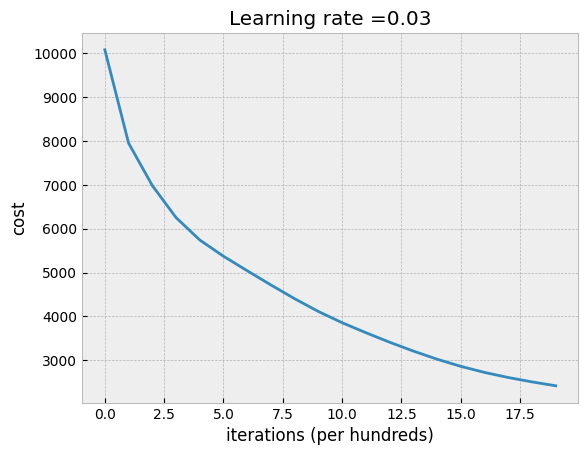

CPU times: user 21min 47s, sys: 6min 23s, total: 28min 11s
Wall time: 3min 39s


In [225]:
%%time
learning_rate = 0.03
num_iterations = 2000
parameters = dl.L_layer_model(X, Y, layers_dims, parameters, learning_rate, num_iterations, print_cost=True)

## d) Get Forward Propagation

In [226]:
pred_train, _ = dl.L_model_forward(X, parameters, layers_dims)

Y_true = np.argmax(Y, axis=0)
Y_pred = np.argmax(pred_train, axis=0)
print(Y_true.shape, Y_pred.shape)

(42000,) (42000,)


## e) Calculating Accuracy

In [227]:
# we can get a train accuracy of around 84.6%, which is decent for an algorithm from scratch.
np.mean(Y_true == Y_pred) * 100

84.64285714285714